In [1]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

## Lecture 8 ##

## Categorical Distribution ##

In [2]:
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [3]:
#What studios are represented in the data?
studios = top_movies.select('Studio')
studios

Studio
MGM
Fox
Fox
Universal
Paramount
Paramount
Universal
MGM
Warner Brothers
Disney


In [4]:
#Group the studio and determine how many movies in the top 200 in 2017 are by each studio.
studio_distribution = studios.group('Studio')

In [5]:
studio_distribution

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24
IFC,1
Lionsgate,3
MGM,7
Metro,1


How many studios total are there in this data?

Are you familiar with all of them?

## Bar Charts ##

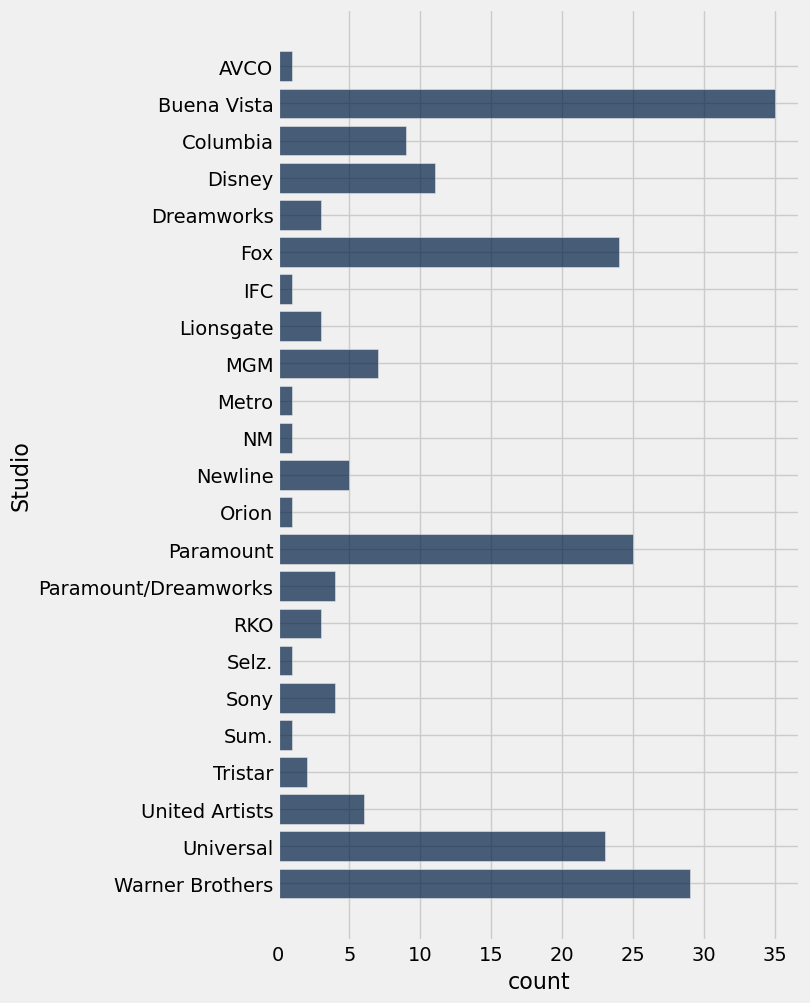

In [6]:
studio_distribution.barh('Studio')

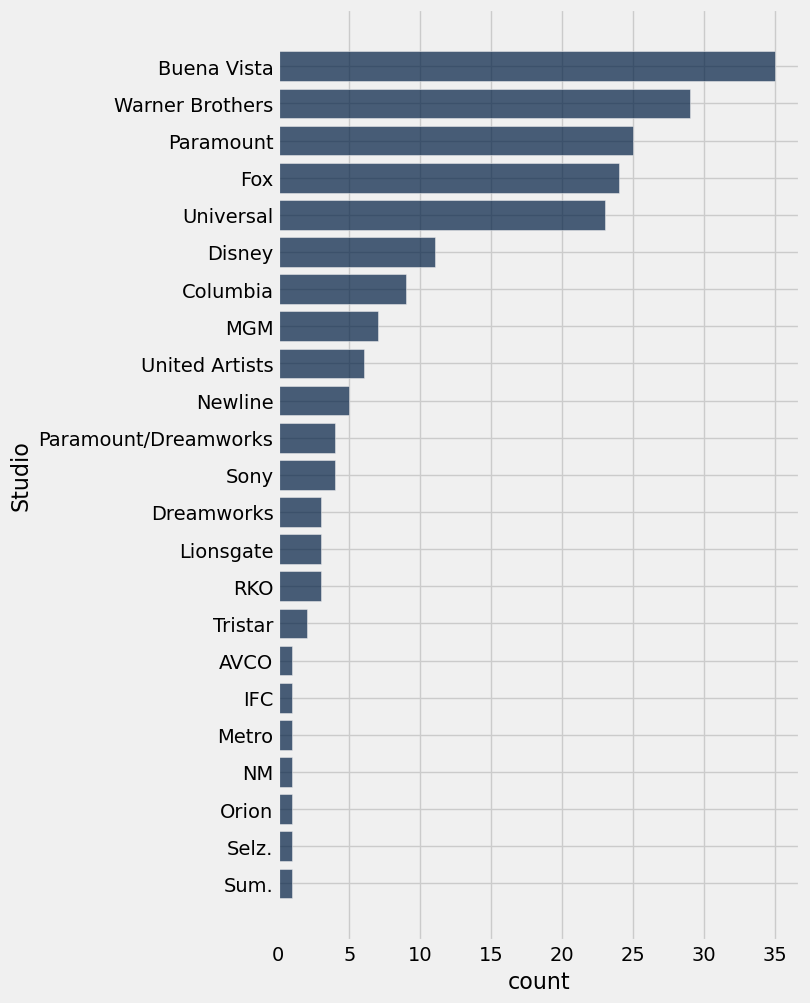

In [7]:
studio_distribution.sort('count', descending=True).barh('Studio')

## Numerical Distribution ##

In [8]:
#Show the age of each movie based on the current year and display them in the top movies table. 
ages = 2025 - top_movies.column('Year')
top_movies = top_movies.with_column('Age', ages)

In [9]:
top_movies

Title,Studio,Gross,Gross (Adjusted),Year,Age
Gone with the Wind,MGM,198676459,1796176700,1939,86
Star Wars,Fox,460998007,1583483200,1977,48
The Sound of Music,Fox,158671368,1266072700,1965,60
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,43
Titanic,Paramount,658672302,1204368000,1997,28
The Ten Commandments,Paramount,65500000,1164590000,1956,69
Jaws,Universal,260000000,1138620700,1975,50
Doctor Zhivago,MGM,111721910,1103564200,1965,60
The Exorcist,Warner Brothers,232906145,983226600,1973,52
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,88


In [10]:
#Determine the youngest and oldest movies
min(ages), max(ages)

(8, 104)

In [12]:
# Create numerical ranges to separate the data in a limited number of groups. 
# In this instance we are defining our own bins, not all of equal width. 

my_bins = make_array(0, 5, 10, 15, 25, 40, 65, 100)

In [13]:
#Determine how many movies fall in a given range.
binned_data = top_movies.bin('Age', bins = my_bins)
binned_data

bin,Age count
0,0
5,12
10,18
15,42
25,44
40,59
65,24
100,0


In [15]:
# Create bins for the data with a range from 0 to 100, with a bin width of 25.
top_movies.bin('Age', bins = np.arange(0, 101, 25))

bin,Age count
0,72
25,69
50,48
75,10
100,0


## Histograms ##
Define histograms

In [16]:
my_bins

array([  0,   5,  10,  15,  25,  40,  65, 100])

In [17]:
binned_data

bin,Age count
0,0
5,12
10,18
15,42
25,44
40,59
65,24
100,0


In [18]:
# Add a column containing what percent of movies are in each bin
binned_data = binned_data.with_column(
    'Percent', 100*binned_data.column('Age count')/200)

In [19]:
binned_data

bin,Age count,Percent
0,0,0
5,12,6
10,18,9
15,42,21
25,44,22
40,59,29.5
65,24,12
100,0,0


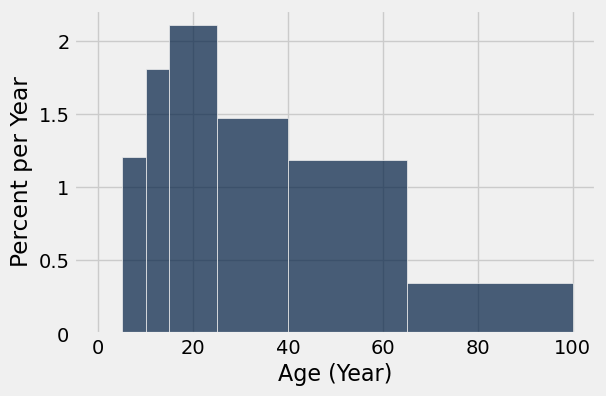

In [20]:
# Let's make our first histogram!
top_movies.hist('Age', bins = my_bins, unit = 'Year')

Bar graphs are for categorical data, histograms are for numeric data. 

What differences do you see when comparing a histogram to a bar graph?

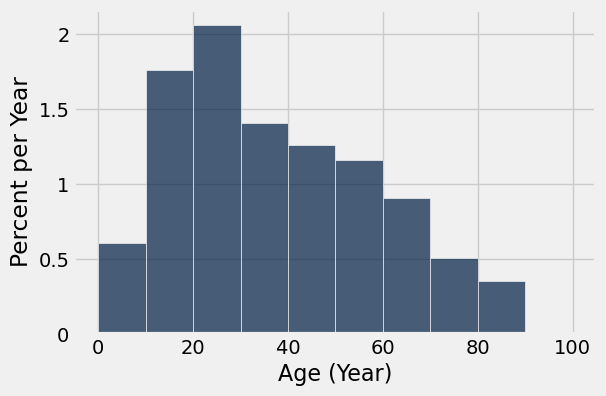

In [21]:
# Let's try equally spaced bins instead.
top_movies.hist('Age', bins = np.arange(0, 110, 10), unit = 'Year')

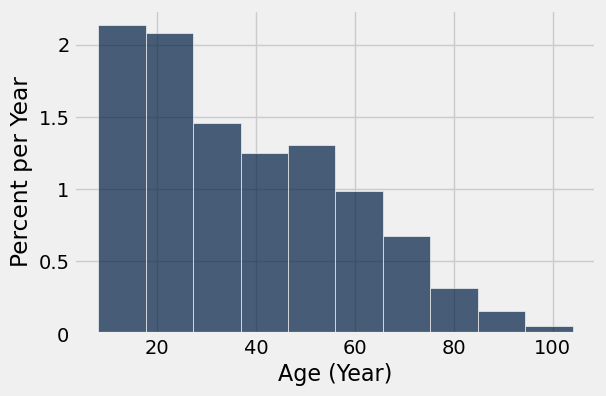

In [22]:
# Let's try not specifying any bins!
top_movies.hist('Age', unit='Year')

Which of the above histograms is easier to interpret the data?



## Height ##

### Question: What is the height of the [40, 65] bin?
The height tells us the percent of the data that is in that bin. 

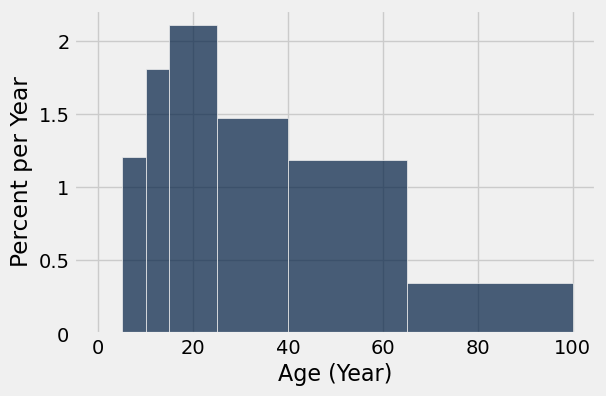

In [27]:
top_movies.hist('Age', bins=my_bins, unit='Year')

In [24]:
# Step 1: Calculate % of movies in the [40, 65) bin
percent = binned_data.where('bin', 40).column('Percent').item(0)
percent

29.5

In [25]:
# Step 2: Calculate the width of the 40-65 bin
width = 65 - 40
width

25

In [26]:
# Step 3: Area of rectangle = height * width
#         --> height = percent / width
height = percent / width
height

1.18

### What are the heights of the rest of the bins?

In [28]:
# Get the bin lefts
bin_lefts = binned_data.take(np.arange(binned_data.num_rows - 1))
bin_lefts

bin,Age count,Percent
0,0,0
5,12,6
10,18,9
15,42,21
25,44,22
40,59,29.5
65,24,12


In [29]:
# Get the bin widths
bin_widths = np.diff(binned_data.column('bin'))
bin_lefts = bin_lefts.with_column('Width', bin_widths)
bin_lefts

bin,Age count,Percent,Width
0,0,0,5
5,12,6,5
10,18,9,5
15,42,21,10
25,44,22,15
40,59,29.5,25
65,24,12,35


In [30]:
# Get the bin heights
bin_heights = bin_lefts.column('Percent') / bin_widths
bin_lefts = bin_lefts.with_column('Height', bin_heights)
bin_lefts

bin,Age count,Percent,Width,Height
0,0,0,5,0
5,12,6,5,1.2
10,18,9,5,1.8
15,42,21,10,2.1
25,44,22,15,1.46667
40,59,29.5,25,1.18
65,24,12,35,0.342857


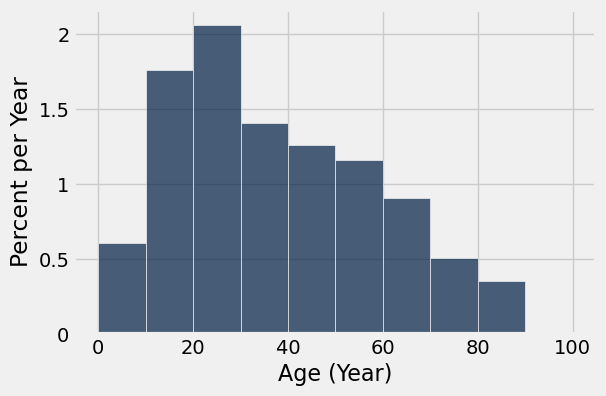

In [32]:
top_movies.hist('Age', bins = np.arange(0, 110, 10), unit = 'Year')

The percent of each bin is represented by the area of each rectangle in the histogram. </br>
If we knew the height and width we could find the percent with multiplication. 

Histograms are also used to find the shape of the data.
The three main shapes:


Which shape fits this data?